# Sub-sky Star Clustering

In [2]:
import numpy as np
import pandas as pd

In [3]:
from sqlalchemy import create_engine

In [4]:
from ipywidgets import IntProgress
from IPython.display import display

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")
plt.rcParams["figure.figsize"] = (16, 9)
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["image.cmap"] = "Spectral"

In [6]:
eng = create_engine("sqlite:///lamost.db5")

In [7]:
key = ["teff", "logg", "feh", "ra", "dec", "planid"]

In [8]:
sql = f"SELECT {','.join(key)} FROM star"

In [9]:
data = pd.read_sql(sql, eng)
data["teff"] = np.log10(data["teff"])

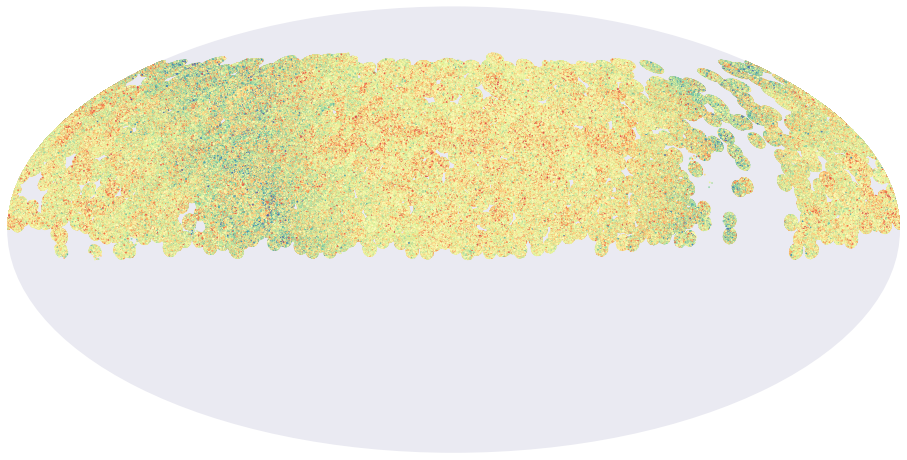

In [11]:
plt.subplot(projection="mollweide")
#plt.title("Lamost dr5 all stars")
#plt.xlabel("Right ascension")
#plt.ylabel("Declination")
plt.scatter(np.radians(data["ra"])-np.pi,
            np.radians(data["dec"]),
            c=data["teff"],
            s=2); #data["logg"]);
plt.xticks([]); plt.yticks([]);

### Grouped by PlanID

In [10]:
grouped = data.groupby("planid")

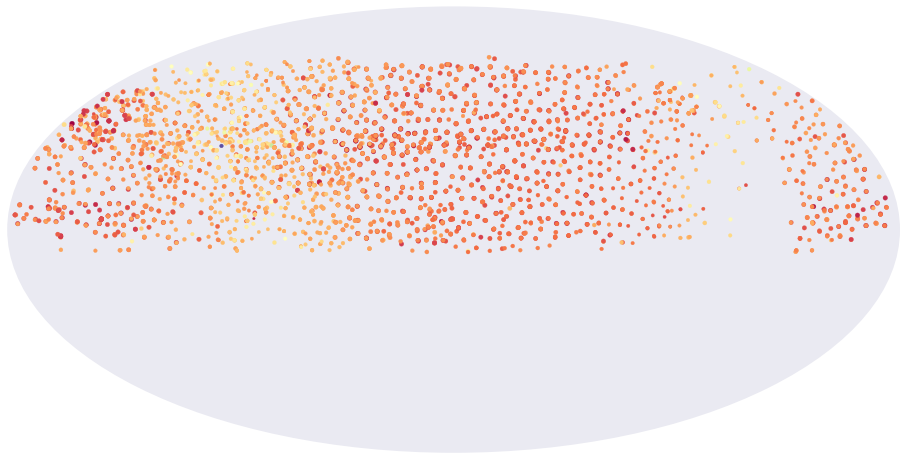

In [13]:
#plt.title("Lamost dr5 star fields")
#plt.xlabel("Right ascension [$\deg$]")
#plt.ylabel("Declination [$\deg$]")
plt.subplot(projection="mollweide")
plt.scatter(np.radians(grouped["ra"].mean())-np.pi,
            np.radians(grouped["dec"].mean()),
            c=grouped["teff"].mean(),
            s=2**(grouped["logg"]).mean());
plt.xticks([]); plt.yticks([]);

### Random Field Selector

In [12]:
plate = np.unique(data["planid"])
rando = np.random.choice(plate)
index = grouped.groups[rando]
group = data.iloc[index]

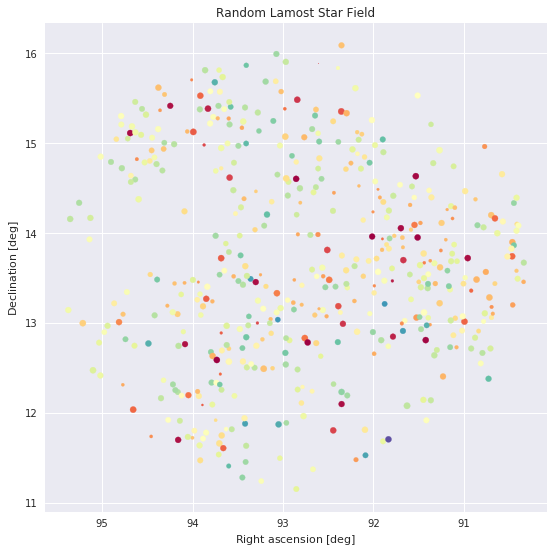

In [15]:
plt.figure(figsize=(9,9))
plt.title("Random Lamost Star Field")
plt.xlabel("Right ascension [$\deg$]")
plt.ylabel("Declination [$\deg$]")
plt.scatter(group["ra"],
            group["dec"],
            c=group["teff"],
            s=np.pi*group["logg"]**1.618);
plt.gca().invert_xaxis();

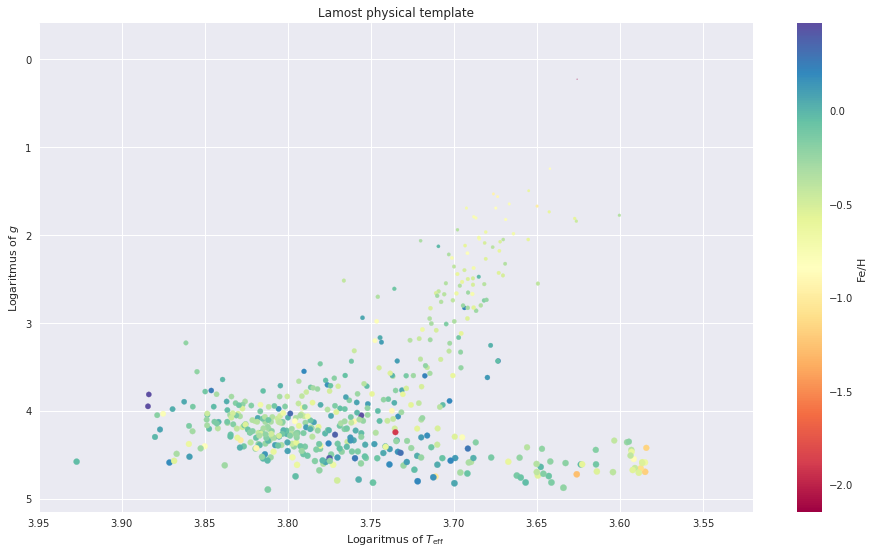

In [18]:
#%%timeit
#plt.figure(1, figsize=(16,9))
plt.title("Lamost physical template")
plt.xlabel("Logaritmus of $T_\mathrm{eff}$")
plt.ylabel("Logaritmus of $g$")
plt.scatter(group["teff"],
            group["logg"],
            c=group["feh"],
            s=np.pi*group["logg"]**1.618);
plt.colorbar().ax.set_ylabel("Fe/H");
plt.gca().invert_xaxis();
plt.gca().invert_yaxis();
plt.xlim([3.95, 3.52]);
plt.ylim([5.15,-0.42]);
#plt.savefig(f"poster/{plan}.png");
#plt.close(1)

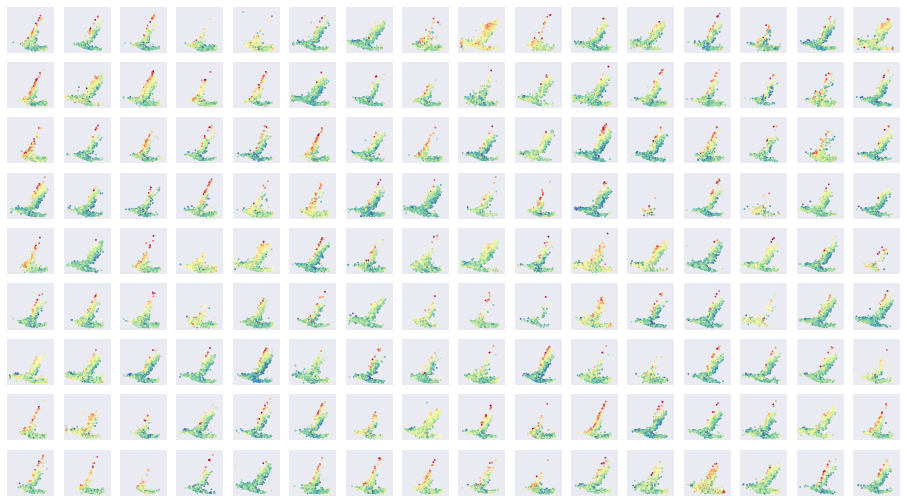

In [31]:
rande = np.random.choice(plate, size=16*9)
for i, rnd in enumerate(rande):
    idx = grouped.groups[rnd]
    grp = data.iloc[idx]
    plt.subplot(9, 16, 1+i)
    plt.scatter(grp["teff"],
                grp["logg"],
                c=grp["feh"],
                s=2);
    plt.gca().invert_xaxis();
    plt.gca().invert_yaxis();
    plt.xlim([3.95, 3.52]);
    plt.ylim([5.15,-0.42]);
    plt.xticks([]);
    plt.yticks([]);